In [3]:
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv(r'C:\Users\user\Desktop\ML\Group_02_Project_report (1)\Group_02\ml new\fer2013.csv')

# Group the data by the values of the "Usage" column and get the count of images in each group
grouped_data = df.groupby('emotion').size()

# Print the count of images in each group
print(grouped_data)


emotion
0    4953
1     547
2    5121
3    8989
4    6077
5    4002
6    6198
dtype: int64


In [4]:
df


,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training
...,...,...,...
35882,6,50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...,PrivateTest
35883,3,178 174 172 173 181 188 191 194 196 199 200 20...,PrivateTest
35884,0,17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...,PrivateTest
35885,3,30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...,PrivateTest


In [8]:
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv(r'C:\Users\user\Desktop\ML\Group_02_Project_report (1)\Group_02\ml new\fer2013.csv')

# Keep only the rows with emotions 3 and 4
df_filtered = df[df['emotion'].isin([3, 4])]

# Reset the index of the filtered DataFrame
df_filtered.reset_index(drop=True, inplace=True)

# Print the filtered DataFrame
print(df_filtered)

df=df_filtered


       emotion                                             pixels        Usage
0            4  24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...     Training
1            4  20 17 19 21 25 38 42 42 46 54 56 62 63 66 82 1...     Training
2            3  77 78 79 79 78 75 60 55 47 48 58 73 77 79 57 5...     Training
3            3  85 84 90 121 101 102 133 153 153 169 177 189 1...     Training
4            3  4 2 13 41 56 62 67 87 95 62 65 70 80 107 127 1...     Training
...        ...                                                ...          ...
15061        3  217 220 222 223 223 224 225 223 223 225 223 22...  PrivateTest
15062        4  54 57 77 122 121 76 73 80 58 22 26 27 35 41 66...  PrivateTest
15063        3  0 39 81 80 104 97 51 64 68 46 41 67 53 68 70 5...  PrivateTest
15064        3  178 174 172 173 181 188 191 194 196 199 200 20...  PrivateTest
15065        3  30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...  PrivateTest

[15066 rows x 3 columns]


In [6]:
# Count the occurrences of each emotion
emotion_counts = df['emotion'].value_counts()

# Print the counts
print(emotion_counts)


3    8989
6    6198
4    6077
2    5121
0    4953
5    4002
1     547
Name: emotion, dtype: int64


In [7]:
df.describe()


,emotion
count,35887.000000
mean,3.323265
std,1.873819
min,0.000000
25%,2.000000
50%,3.000000
75%,5.000000
max,6.000000


In [6]:
import pandas as pd
import numpy as np

# Select a random sample from the dataset
sample_size = 1000  # Adjust the sample size as needed
random_sample = df.sample(n=sample_size, random_state=1)

# Select the pixel column and emotion column from the random sample
pixels = random_sample['pixels'].apply(lambda x: np.fromstring(x, sep=' ').reshape(48, 48))
emotion = random_sample['emotion']

# Flatten the pixel arrays
pixels_flat = np.stack(pixels).reshape(len(pixels), -1)

# Calculate the correlation between the emotion column and all pixels
valid_columns = np.where(pixels_flat.std(axis=0) != 0)[0]
correlation_matrix = np.corrcoef(pixels_flat[:, valid_columns].T, emotion)

# Get the correlation of emotion with all pixels
emotion_correlation = np.full(pixels_flat.shape[1], np.nan)
emotion_correlation[valid_columns] = correlation_matrix[:-1, -1]

# Print the correlation of emotion with all pixels
print(emotion_correlation)


[-0.04100704 -0.03584096 -0.03062466 ...  0.01576522  0.01988822
  0.01256976]


In [7]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier


In [8]:

# Rename "PrivateTest" and "PublicTest" groups to "Test"
df['Usage'] = df['Usage'].replace(['PrivateTest', 'PublicTest'], 'Test')

# Group the data by the values of the "Usage" column and get the count of images in each group
grouped_data = df.groupby('Usage').size()

# Print the count of images in each group
print(grouped_data)

Usage
Test         3021
Training    12045
dtype: int64


In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# Get the indices of the training and testing samples
train_indices = df[df['Usage'] == 'Training'].sample(n=12000, random_state=42).index
test_indices = df[df['Usage'] == 'Test'].sample(n=2500, random_state=42).index

# Select the training and testing data based on the indices
train_data = df.loc[train_indices]
test_data = df.loc[test_indices]

# Extract pixel values and labels
X_train = train_data['pixels'].values
y_train = train_data['emotion'].values
X_test = test_data['pixels'].values
y_test = test_data['emotion'].values

# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Convert pixel values to numpy arrays
X_train = [np.fromstring(x, dtype=int, sep=' ') for x in X_train]
X_val = [np.fromstring(x, dtype=int, sep=' ') for x in X_val]
X_test = [np.fromstring(x, dtype=int, sep=' ') for x in X_test]

# Train the Random Forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on the validation set
y_val_pred = model.predict(X_val)



# Calculate precision, recall, and F1-score
precision = precision_score(y_val, y_val_pred, average='weighted')
recall = recall_score(y_val, y_val_pred, average='weighted')
f1 = f1_score(y_val, y_val_pred, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Predict on the test set
y_test_pred = model.predict(X_test)



# Calculate precision, recall, and F1-score for the test set
precision_test = precision_score(y_test, y_test_pred, average='weighted')
recall_test = recall_score(y_test, y_test_pred, average='weighted')
f1_test = f1_score(y_test, y_test_pred, average='weighted')

print("Test Precision:", precision_test)
print("Test Recall:", recall_test)
print("Test F1-score:", f1_test)


Precision: 0.7202657178616664
Recall: 0.7229166666666667
F1-score: 0.71338904577846
Test Precision: 0.7193564904292847
Test Recall: 0.72
Test F1-score: 0.7109866122327606


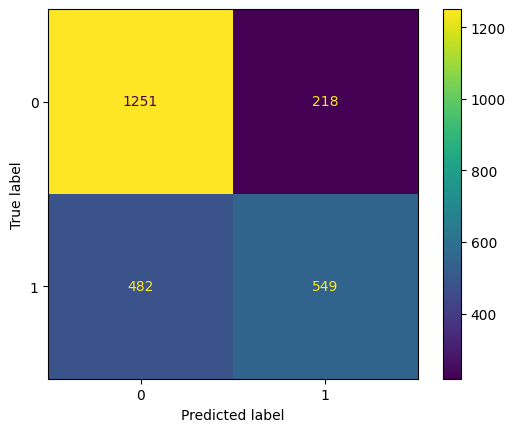

In [10]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()


In [13]:
from joblib import dump

# Calculate the accuracy on the validation set
val_accuracy = model.score(X_val, y_val)
print("Validation Accuracy:", val_accuracy)

# Calculate the accuracy on the test set
test_accuracy = model.score(X_test, y_test)
print("Test Accuracy:", test_accuracy)

# Save the trained model to a file
dump(model, 'trained_model_new.joblib')
print("Trained model saved to 'trained_model_new.joblib'")


Validation Accuracy: 0.7229166666666667
Test Accuracy: 0.72
Trained model saved to 'trained_model_new.joblib'


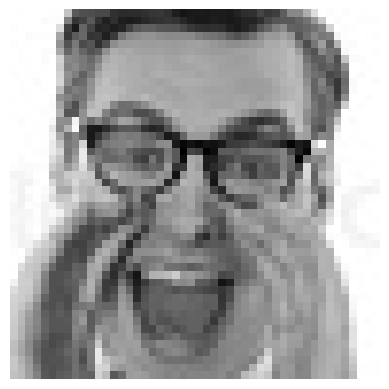

Predicted Emotion: Happy


In [16]:
import cv2

# Function to convert image to 48x48 grayscale
def convert_to_grayscale(image_path):
    # Read the image
    image = cv2.imread(image_path)
    
    # Convert to grayscale
    grayscale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Resize to 48x48
    resized_image = cv2.resize(grayscale_image, (48, 48))
    
    return resized_image

# Example usage
image_path = r'C:\Users\dilsh\ml new\happy\PrivateTest_251881.jpg'  # Replace with the actual image file path
resized_image = convert_to_grayscale(image_path)

import matplotlib.pyplot as plt

# Plot the resized image
plt.imshow(resized_image, cmap='gray')
plt.axis('off')
plt.show()

from joblib import load

# Load the trained model
model = load('trained_model_new.joblib')

# Define the emotion labels
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

# Reshape the image to match the expected input shape of the model
reshaped_image = resized_image.reshape(1, -1)

# Predict the emotion label
emotion_label = model.predict(reshaped_image)[0]

# Map the emotion label to the corresponding emotion name
emotion_name = emotion_labels[emotion_label]

# Print the predicted emotion name
print("Predicted Emotion:", emotion_name)




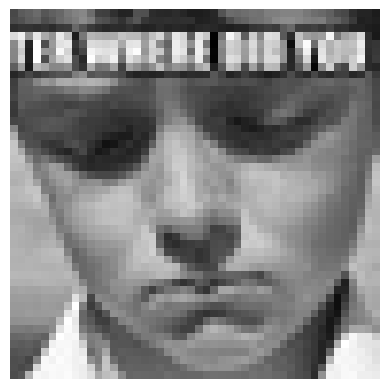

Predicted Emotion: Sad


In [15]:
import cv2

# Function to convert image to 48x48 grayscale
def convert_to_grayscale(image_path):
    # Read the image
    image = cv2.imread(image_path)
    
    # Convert to grayscale
    grayscale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Resize to 48x48
    resized_image = cv2.resize(grayscale_image, (48, 48))
    
    return resized_image

# Example usage
image_path = r'C:\Users\dilsh\ml new\sad\PrivateTest_3062720.jpg'  # Replace with the actual image file path
resized_image = convert_to_grayscale(image_path)

import matplotlib.pyplot as plt

# Plot the resized image
plt.imshow(resized_image, cmap='gray')
plt.axis('off')
plt.show()

from joblib import load

# Load the trained model
model = load('trained_model.joblib')

# Define the emotion labels
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

# Reshape the image to match the expected input shape of the model
reshaped_image = resized_image.reshape(1, -1)

# Predict the emotion label
emotion_label = model.predict(reshaped_image)[0]

# Map the emotion label to the corresponding emotion name
emotion_name = emotion_labels[emotion_label]

# Print the predicted emotion name
print("Predicted Emotion:", emotion_name)


